In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index = pd.read_csv("economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
##inplace=True is used for updating the df_index
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

KeyError: "['Unnamed: 0', 'year', 'month'] not found in axis"

In [8]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

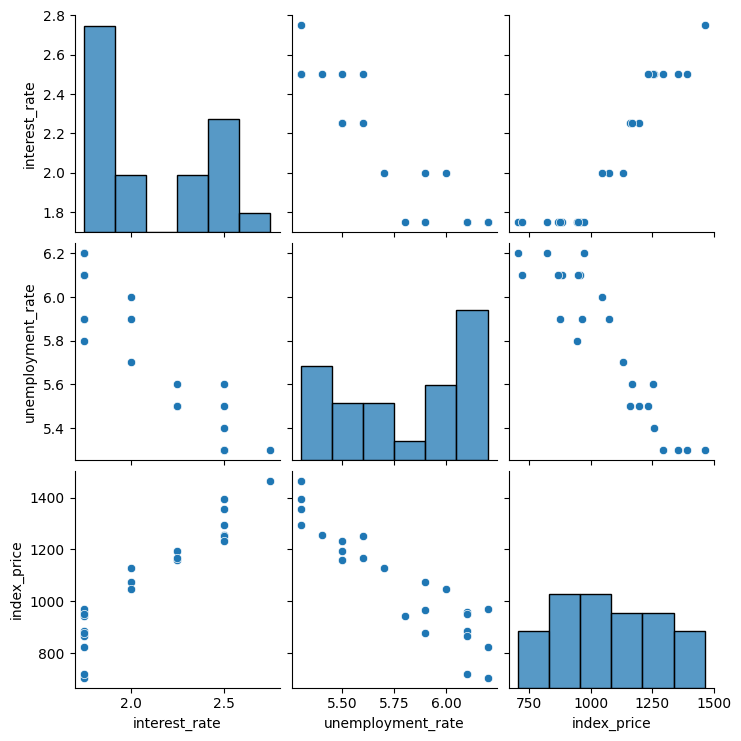

In [16]:
##make a some data visualization plots
import seaborn as sns
sns.pairplot(df_index)


In [17]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

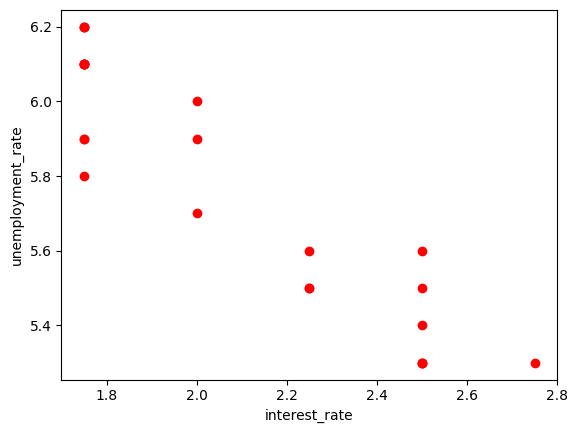

In [20]:
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color="r")
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [26]:
##Dependent and independent features
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]


In [27]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [28]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [29]:
##train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.25,random_state=42)

In [32]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

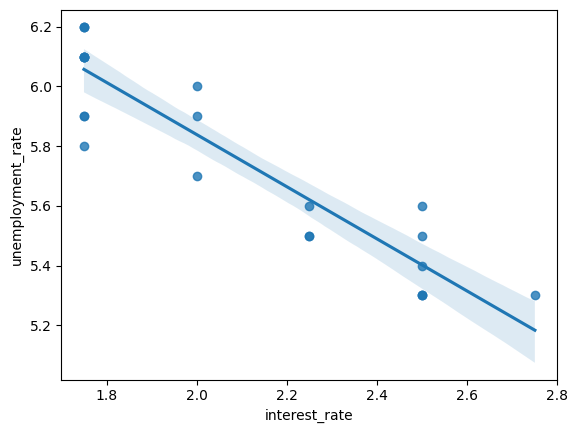

In [40]:
sns.regplot(x=df_index['interest_rate'],y=df_index["unemployment_rate"])

<Axes: xlabel='interest_rate', ylabel='index_price'>

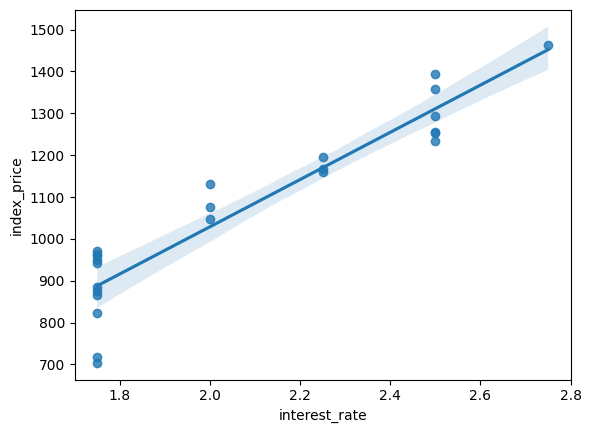

In [41]:
sns.regplot(x=df_index['interest_rate'],y=df_index["index_price"])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

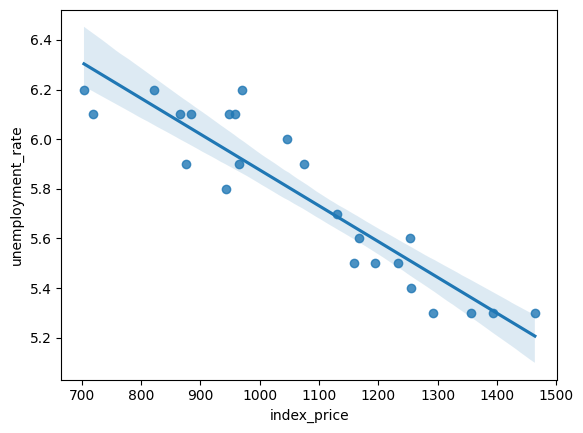

In [42]:
sns.regplot(x=df_index['index_price'],y=df_index["unemployment_rate"])

In [43]:
##Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [44]:
X_train

array([[-0.8660254 ,  1.27807831],
       [ 0.8660254 , -1.14354375],
       [ 0.        , -0.3363364 ],
       [-0.8660254 ,  0.06726728],
       [-0.8660254 ,  1.27807831],
       [ 1.73205081, -1.14354375]])

In [45]:
##Linear Regression model
from sklearn.linear_model import LinearRegression

In [46]:
regression = LinearRegression()
regression.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [47]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [49]:
np.mean(cvs)

np.float64(-7820.756240551767)

In [52]:
##prediction
y_pred = regression.predict(X_test)
y_pred

array([1146.20748698,  797.05686794, 1280.87888652,  839.95271184,
        950.18425551, 1103.31164308,  925.74439964, 1256.43903065,
        797.05686794, 1127.75149895, 1256.43903065,  907.28841161,
        839.95271184, 1256.43903065, 1213.54318675,  797.05686794,
        839.95271184,  925.74439964])

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [54]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("mean squared error:",mse)
print("mean absolute error:",mae)
print("root mean squared error:",rmse)

mean squared error: 10682.505098685873
mean absolute error: 89.97791862049176
root mean squared error: 103.35620493558126


In [56]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print("R-squared:",score)

R-squared: 0.7560187688535143


In [58]:
print("Adjusted_R-squared:",1-(1-score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1]-1))

Adjusted_R-squared: 0.7234879380339828


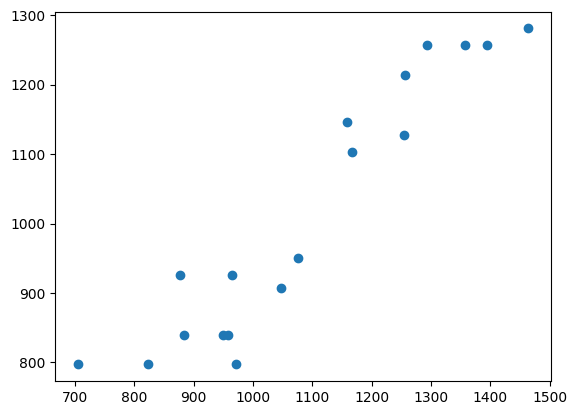

In [61]:
##draw scatterplot for the y_test and y_pred
plt.scatter(y_test,y_pred)

In [62]:
##print the residuals
residuals = y_test - y_pred
print("Residuals:",residuals)

Residuals: 8      12.792513
16    173.943132
0     183.121113
18     44.047288
11    124.815744
9      63.688357
13     39.255600
1     137.560969
21     24.943132
5     126.248501
2     100.560969
12    139.711588
15    118.047288
3      36.560969
4      42.456813
22    -93.056868
17    109.047288
20    -49.744400
Name: index_price, dtype: float64


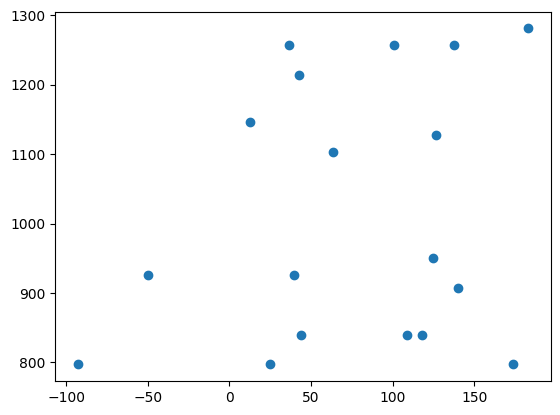

In [67]:
plt.scatter(residuals,y_pred)

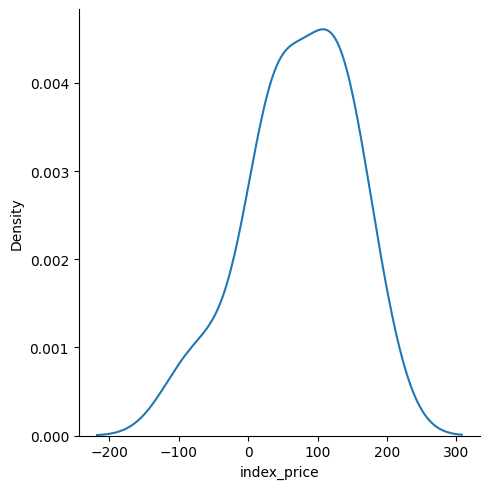

In [63]:
sns.displot(residuals,kind="kde")

In [66]:
print("Coefficient:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient: [  34.69626498 -147.77156853]
Intercept: 1014.4999999999994


In [68]:
import statsmodels.api as sm

model = sm.OLS(y_train,X_train).fit()

In [69]:
model.summary()

c:\Users\sajin\OneDrive\Desktop\Udemy_DS\myenv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.455
Method:                 Least Squares   F-statistic:                            0.06202
Date:                Thu, 01 Jan 2026   Prob (F-statistic):                       0.941
Time:                        13:45:36   Log-Likelihood:                         -50.055
No. Observations:                   6   AIC:                                      104.1
Df Residuals:                       4   BIC:                                      103.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            34.6963   1044.618      0.033      0.975   -2865.627    2935.020
x2          -147.7716   1044.618     -0.141      0.894   -3048.095    2752.552
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.006
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.437
Skew:                           0.168   Prob(JB):                        0.804
Kurtosis:                       1.721   Cond. No.                         3.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
##predict the new data
regression.predict(scaler.transform([[2.50,5.3]]))  #2.50	5.3	1394

c:\Users\sajin\OneDrive\Desktop\Udemy_DS\myenv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1256.43903065])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100,1)